In [1]:
# import data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tips.csv')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [6]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
# total tips
print(f"Total tips: {df['tip'].sum()}")

# max tip
print(f"Max tip: {df['tip'].max()}")

# min tip
print(f"Min tip: {df['tip'].min()}")

# max total bill
print(f"Max total bill: {df['total_bill'].max()}")

# min total bill
print(f"Min total bill: {df['total_bill'].min()}")

Total tips: 731.5799999999999
Max tip: 10.0
Min tip: 1.0
Max total bill: 50.81
Min total bill: 3.07


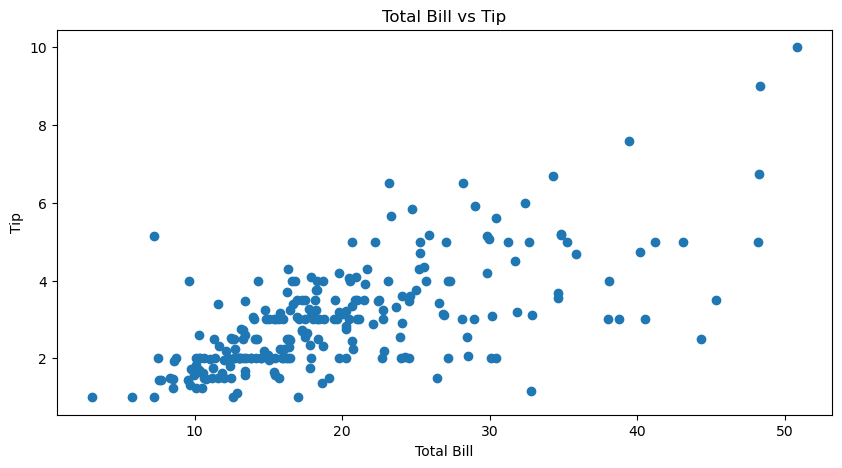

In [9]:
# scatter plot of total bill and tip
fig = plt.figure(figsize=(10, 5))
plt.scatter(df['total_bill'], df['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')
plt.show()

<Axes: xlabel='sex', ylabel='total_bill'>

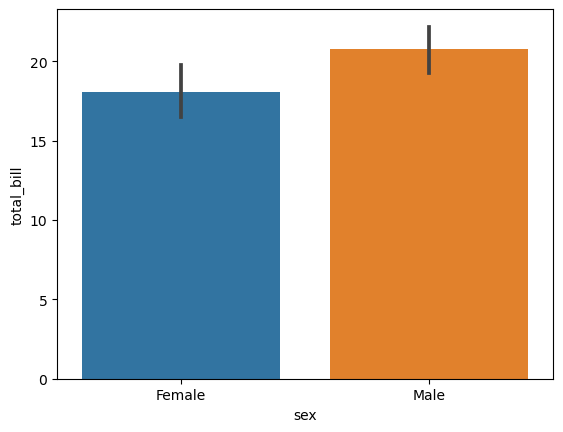

In [10]:
# bar chart of sex vs total bill
sns.barplot(x='sex', y='total_bill', data=df)

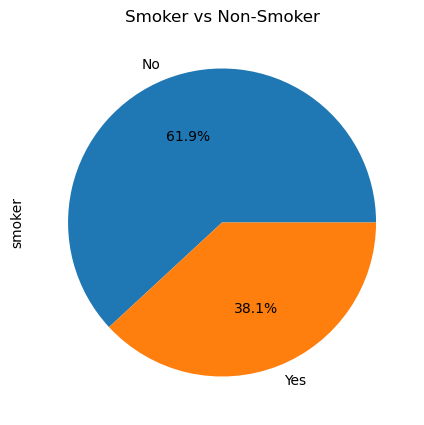

In [11]:
# pie plot of smoker and non smoker vs tips
fig = plt.figure(figsize=(10, 5))
df['smoker'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Smoker vs Non-Smoker')
plt.show()

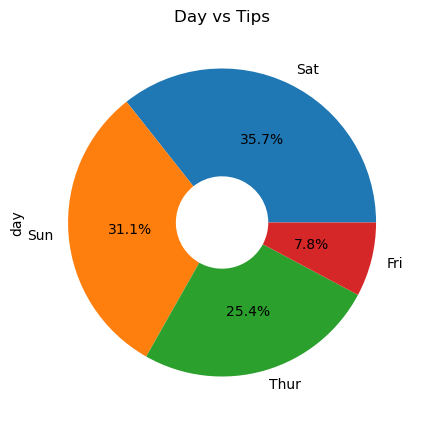

In [12]:
# donut chart of day vs tips
fig, ax = plt.subplots(figsize=(10, 5))
df['day'].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops=dict(width=0.7))  
plt.title('Day vs Tips')
plt.show()

<Axes: xlabel='time', ylabel='total_bill'>

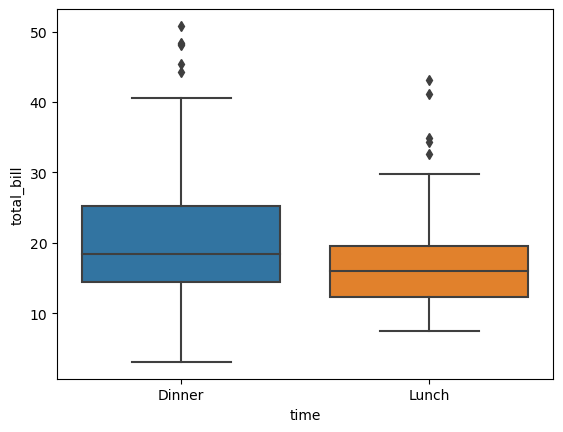

In [13]:
# box plot of time vs total bill
sns.boxplot(x='time', y='total_bill', data=df)

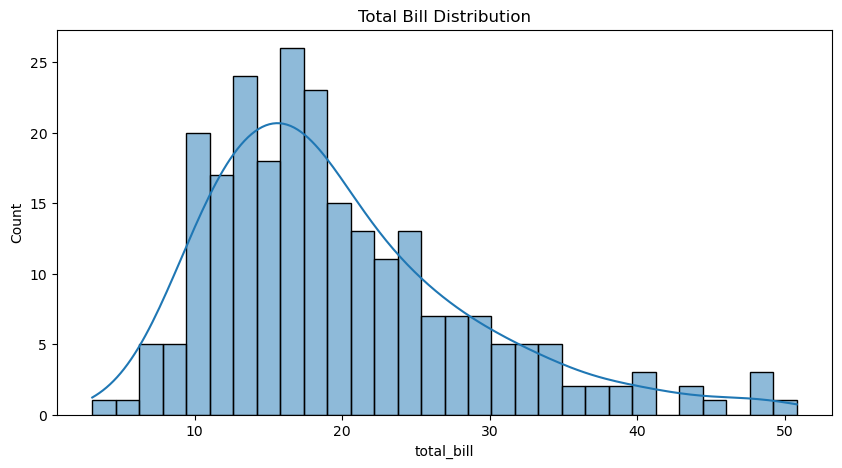

In [14]:
# distribution plot for all data
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['total_bill'], kde=True, bins=30)
plt.title('Total Bill Distribution')
plt.show()


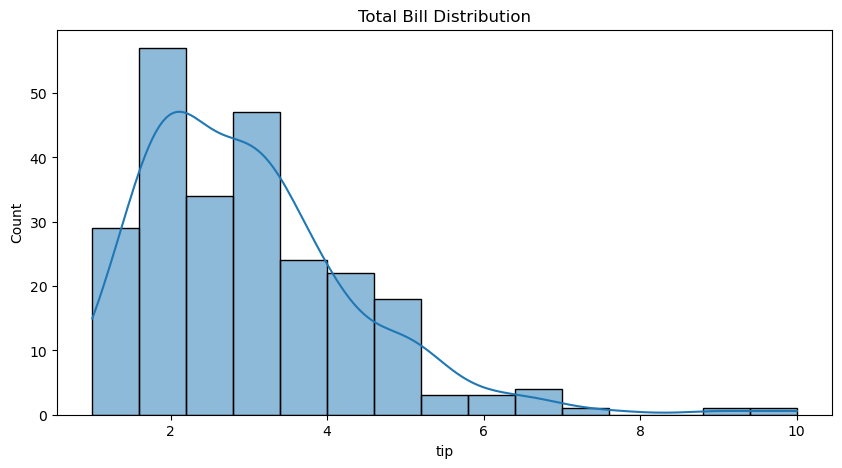

In [15]:
# distribution plot for all data
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['tip'], kde=True, bins=15)
plt.title('Total Bill Distribution')
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
le = LabelEncoder()
df['smoker'] = le.fit_transform(df['smoker'])
le = LabelEncoder()
df['day'] = le.fit_transform(df['day'])
le = LabelEncoder()
df['time'] = le.fit_transform(df['time'])

In [18]:
X = df.drop('tip', axis=1)  # Features
y = df['tip']                # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6703807496461157
Mean Squared Error: 0.6948129686287708
Root Mean Squared Error: 0.8335544185167342


In [22]:
import joblib

# Save the model
joblib.dump(model, 'model.pkl')

# Save the label encoders
joblib.dump(le, 'labelencoder.pkl')

['labelencoder.pkl']

In [23]:
X =  np.array([30.00, 'Male', 'Yes', 'Sun', 'Dinner', 10])

le = LabelEncoder()
all_unique_values = np.unique(X)  
le.fit(all_unique_values)

X = le.transform(X)
X = X.astype(float)
model.predict([X])

C:\Users\ziadz\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.05460294])

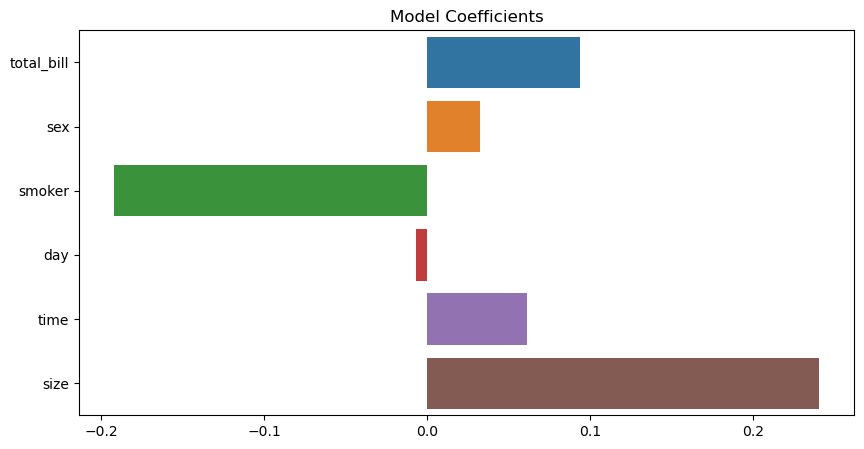

In [76]:
# make a vis for the model
import matplotlib.pyplot as plt
import seaborn as sns

# plot the model coefficients
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=model.coef_, y=model.feature_names_in_)
plt.title('Model Coefficients')
plt.show()


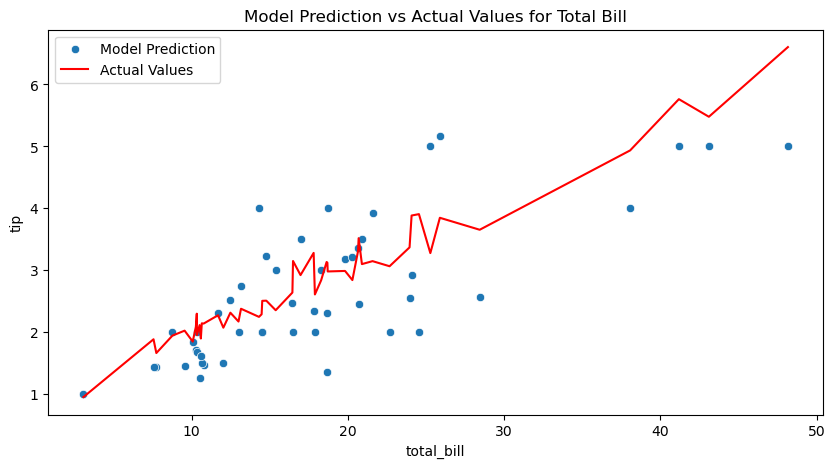

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the model line
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=X_test['total_bill'], y=y_test)
sns.lineplot(x=X_test['total_bill'], y=y_pred, color='r')

# add legend
plt.legend(['Model Prediction', 'Actual Values'])

# More descriptive title
plt.title('Model Prediction vs Actual Values for Total Bill')

plt.show()

# save fig
fig.savefig('model_prediction_vs_actual_values.png')